In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
sns.set(style="whitegrid")
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [2]:
# ignore warnings
import warnings
warnings.filterwarnings('ignore')


In [3]:
fifa19 = pd.read_csv(r"C:\Users\pc\Desktop\FIFA.csv")

In [4]:
# EDA

In [5]:
fifa19.head()

Unnamed: 0      ID               Name  Age  \
0           0  158023           L. Messi   31   
1           1   20801  Cristiano Ronaldo   33   
2           2  190871          Neymar Jr   26   
3           3  193080             De Gea   27   
4           4  192985       K. De Bruyne   27   

                                            Photo Nationality  \
0  https://cdn.sofifa.org/players/4/19/158023.png   Argentina   
1   https://cdn.sofifa.org/players/4/19/20801.png    Portugal   
2  https://cdn.sofifa.org/players/4/19/190871.png      Brazil   
3  https://cdn.sofifa.org/players/4/19/193080.png       Spain   
4  https://cdn.sofifa.org/players/4/19/192985.png     Belgium   

                                  Flag  Overall  Potential  \
0  https://cdn.sofifa.org/flags/52.png       94         94   
1  https://cdn.sofifa.org/flags/38.png       94         94   
2  https://cdn.sofifa.org/flags/54.png       92         93   
3  https://cdn.sofifa.org/flags/45.png       91         93   
4   https://cdn.sofifa.org/flags/7.png       91         92   

                  Club  ... Composure Marking StandingTackle  SlidingTackle  \
0         FC Barcelona  ...      96.0    33.0           28.0           26.0   
1             Juventus  ...      95.0    28.0           31.0           23.0   
2  Paris Saint-Germain  ...      94.0    27.0           24.0           33.0   
3    Manchester United  ...      68.0    15.0           21.0           13.0   
4      Manchester City  ...      88.0    68.0           58.0           51.0   

  GKDiving  GKHandling  GKKicking  GKPositioning GKReflexes Release Clause  
0      6.0        11.0       15.0           14.0        8.0        €226.5M  
1      7.0        11.0       15.0           14.0       11.0        €127.1M  
2      9.0         9.0       15.0           15.0       11.0        €228.1M  
3     90.0        85.0       87.0           88.0       94.0        €138.6M  
4     15.0        13.0        5.0           10.0       13.0        €196.4M  

[5 rows x 89 columns]

In [6]:
fifa19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Photo                     18207 non-null  object 
 5   Nationality               18207 non-null  object 
 6   Flag                      18207 non-null  object 
 7   Overall                   18207 non-null  int64  
 8   Potential                 18207 non-null  int64  
 9   Club                      17966 non-null  object 
 10  Club Logo                 18207 non-null  object 
 11  Value                     18207 non-null  object 
 12  Wage                      18207 non-null  object 
 13  Special                   18207 non-null  int64  
 14  Prefer

In [7]:
fifa19['Body Type'].value_counts()

Body Type
Normal                 10595
Lean                    6417
Stocky                  1140
Messi                      1
C. Ronaldo                 1
Neymar                     1
Courtois                   1
PLAYER_BODY_TYPE_25        1
Shaqiri                    1
Akinfenwa                  1
Name: count, dtype: int64

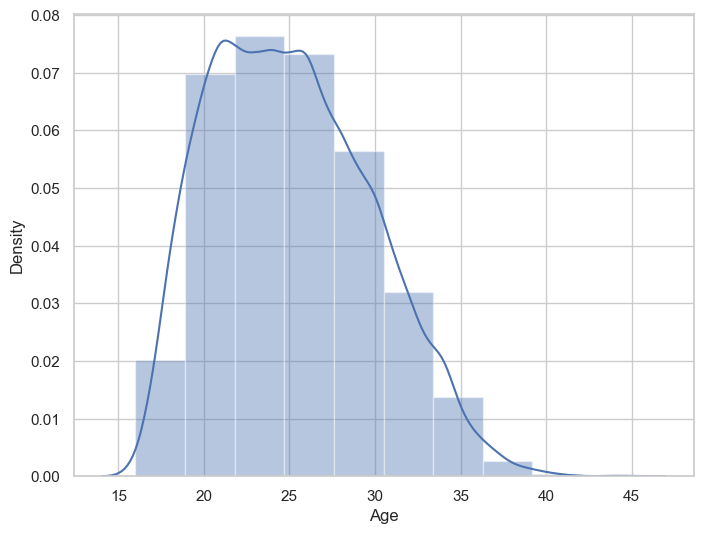

In [8]:
f, ax = plt.subplots(figsize=(8,6))
x = fifa19['Age']
ax = sns.distplot(x, bins=10)
plt.show()

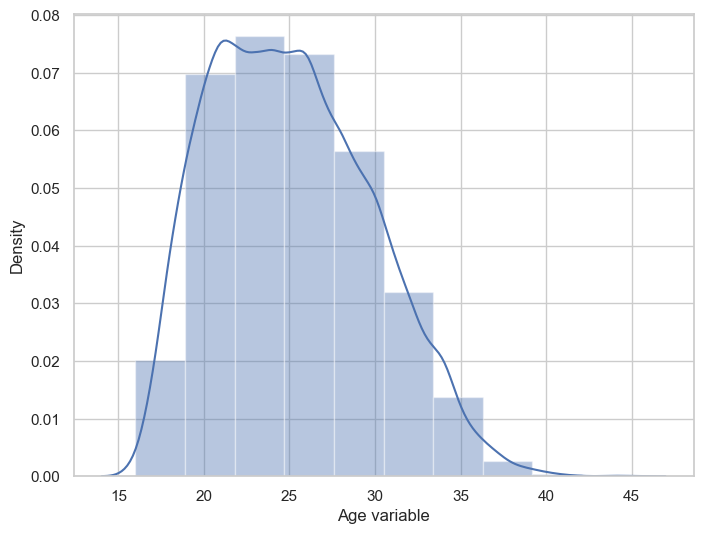

In [9]:
f, ax = plt.subplots(figsize=(8,6))
x = fifa19['Age']
x = pd.Series(x, name="Age variable")
ax = sns.distplot(x, bins=10)
plt.show()

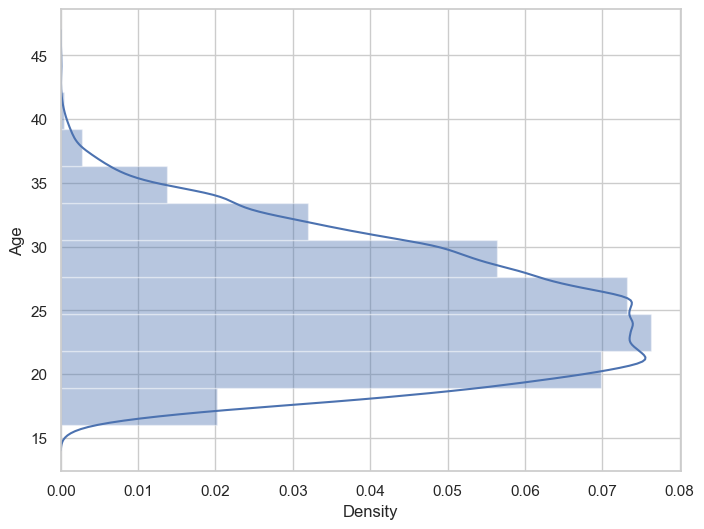

In [10]:
f, ax = plt.subplots(figsize=(8,6))
x = fifa19['Age']
ax = sns.distplot(x, bins=10, vertical = True)
plt.show()

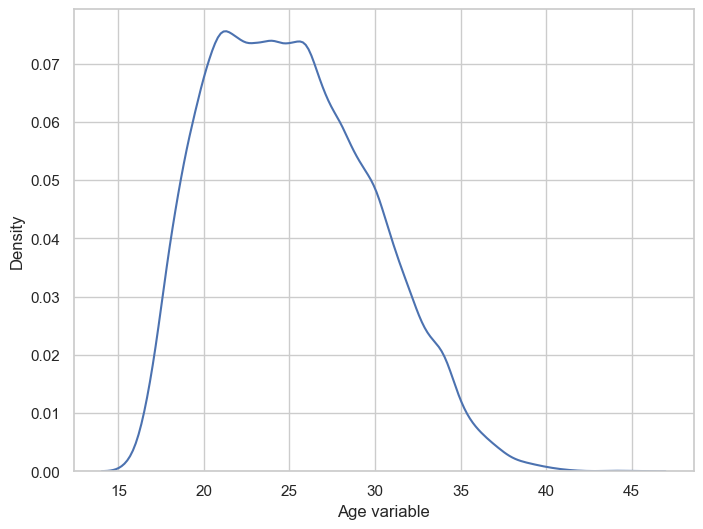

In [11]:
f, ax = plt.subplots(figsize=(8,6))
x = fifa19['Age']
x = pd.Series(x, name="Age variable")
ax = sns.kdeplot(x)
plt.show()

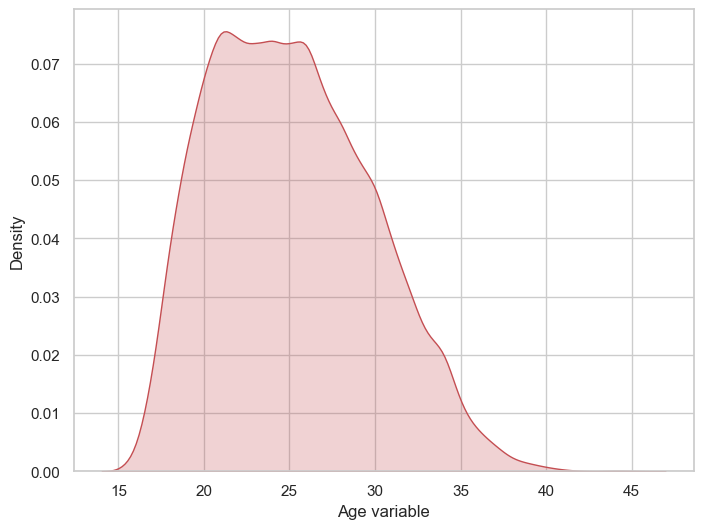

In [12]:
f, ax = plt.subplots(figsize=(8,6))
x = fifa19['Age']
x = pd.Series(x, name="Age variable")
ax = sns.kdeplot(x, shade=True, color='r')
plt.show()

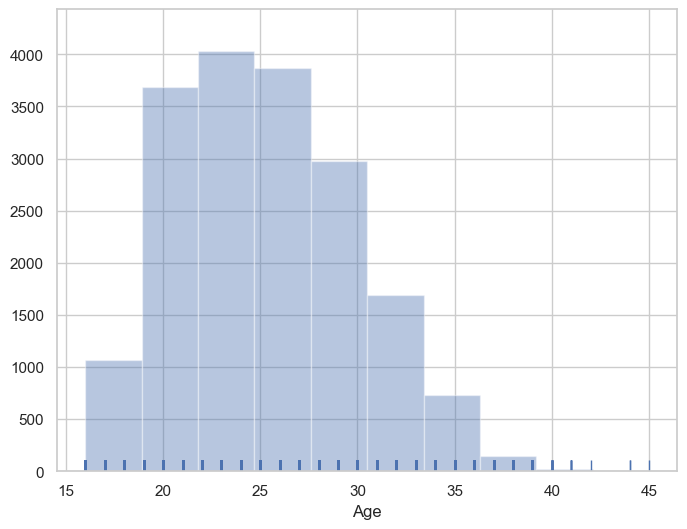

In [13]:
f, ax = plt.subplots(figsize=(8,6))
x = fifa19['Age']
ax = sns.distplot(x, kde=False, rug=True, bins=10)
plt.show()

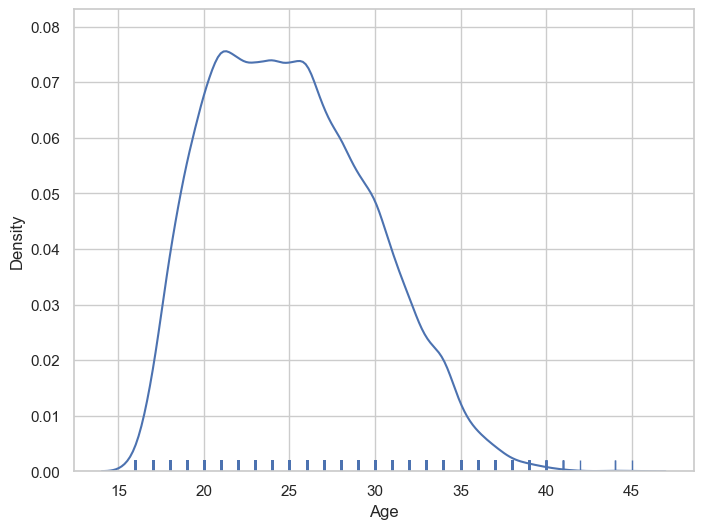

In [14]:
f, ax = plt.subplots(figsize=(8,6))
x = fifa19['Age']
ax = sns.distplot(x, hist=False, rug=True, bins=10)
plt.show()

In [15]:
fifa19['Preferred Foot'].value_counts()

Preferred Foot
Right    13948
Left      4211
Name: count, dtype: int64

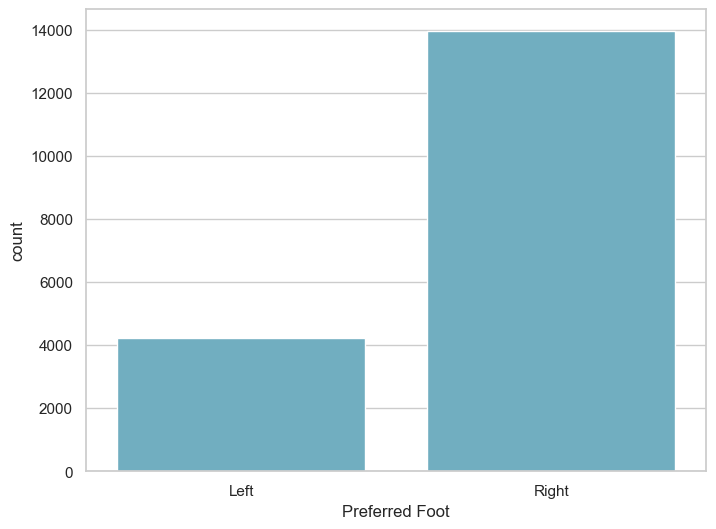

In [16]:
f, ax = plt.subplots(figsize=(8,6))
sns.countplot(x='Preferred Foot', data=fifa19, color="c")
plt.show()

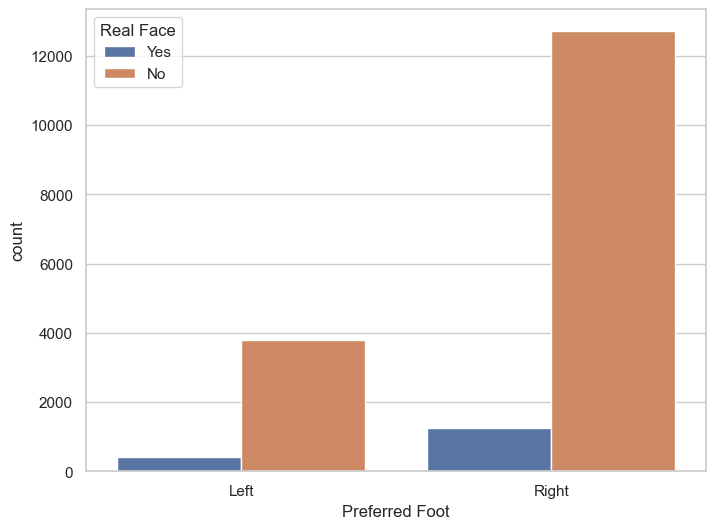

In [17]:
f, ax = plt.subplots(figsize=(8, 6))
sns.countplot(x="Preferred Foot", hue="Real Face", data=fifa19)
plt.show()

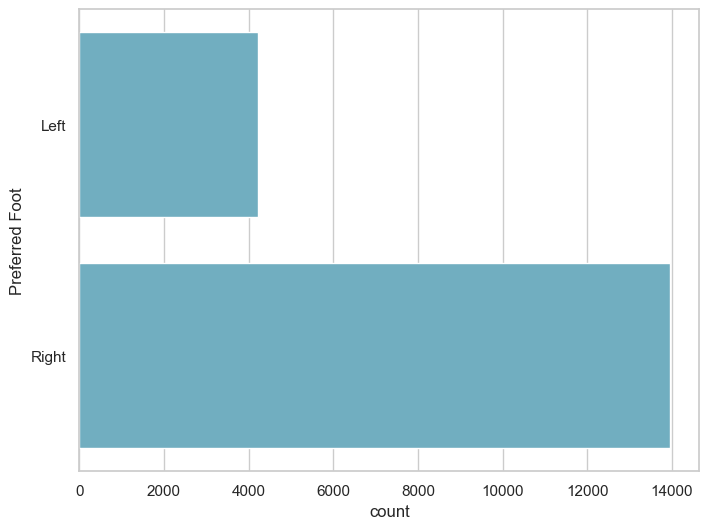

In [18]:
f, ax = plt.subplots(figsize=(8, 6))
sns.countplot(y="Preferred Foot",  data=fifa19, color="c")
plt.show()

In [19]:
g = sns.catplot(x="Preferred Foot", kind="count", palette="ch:.25", data=fifa19)

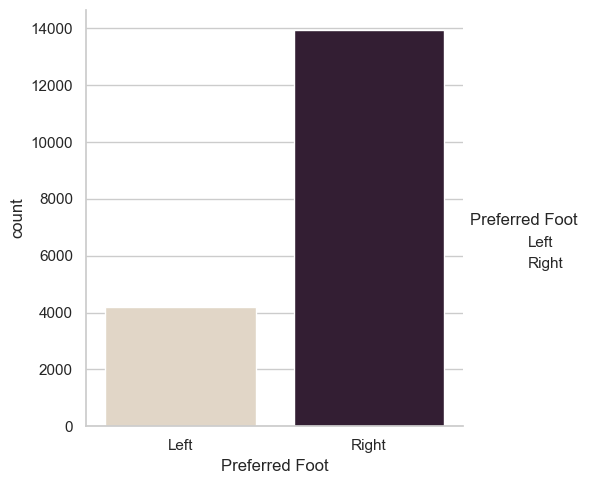

In [20]:
plt.show()

In [21]:
fifa19['International Reputation'].nunique()

5

In [22]:
fifa19['International Reputation'].value_counts()

International Reputation
1.0    16532
2.0     1261
3.0      309
4.0       51
5.0        6
Name: count, dtype: int64

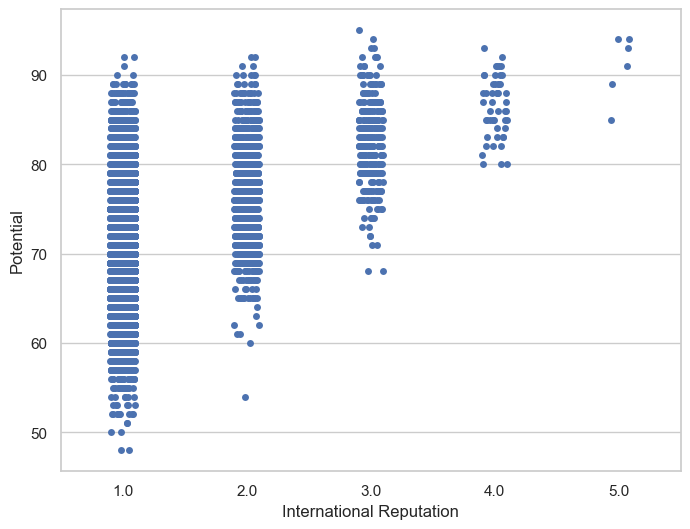

In [23]:
f, ax = plt.subplots(figsize=(8, 6))
sns.stripplot(x="International Reputation", y="Potential", data=fifa19) 
plt.show()

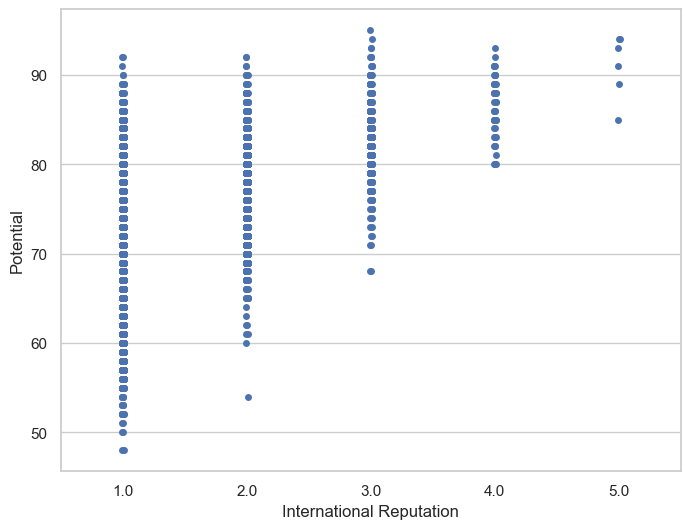

In [24]:
f, ax = plt.subplots(figsize=(8, 6))
sns.stripplot(x="International Reputation", y="Potential", data=fifa19, jitter=0.01)
plt.show()

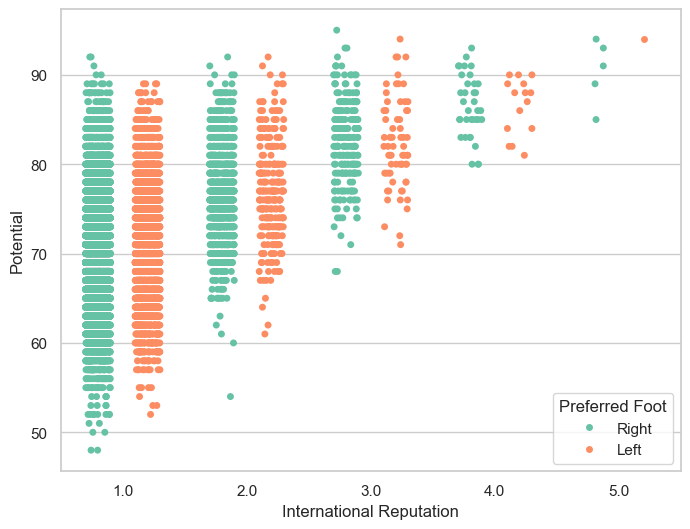

In [25]:
f, ax = plt.subplots(figsize=(8, 6))
sns.stripplot(x="International Reputation", y="Potential", hue="Preferred Foot",
                   data=fifa19, jitter=0.2, palette="Set2", dodge=True)
plt.show()

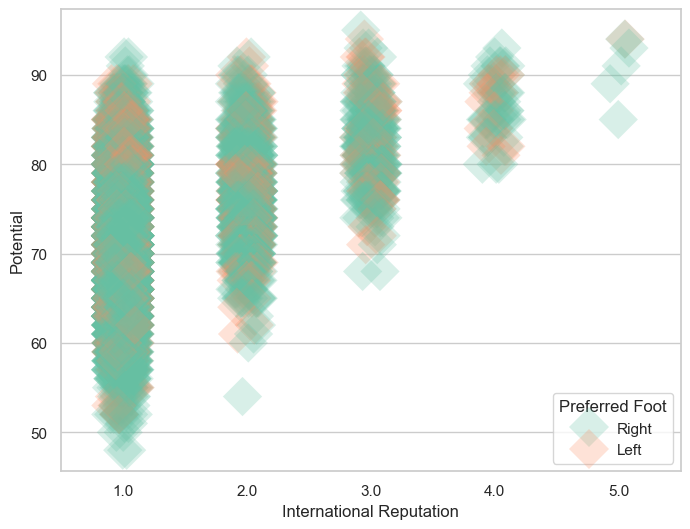

In [26]:
f, ax = plt.subplots(figsize=(8, 6))
sns.stripplot(x="International Reputation", y="Potential", hue="Preferred Foot", 
                   data=fifa19, palette="Set2", size=20, marker="D",
                    edgecolor="gray", alpha=.25)
plt.show()

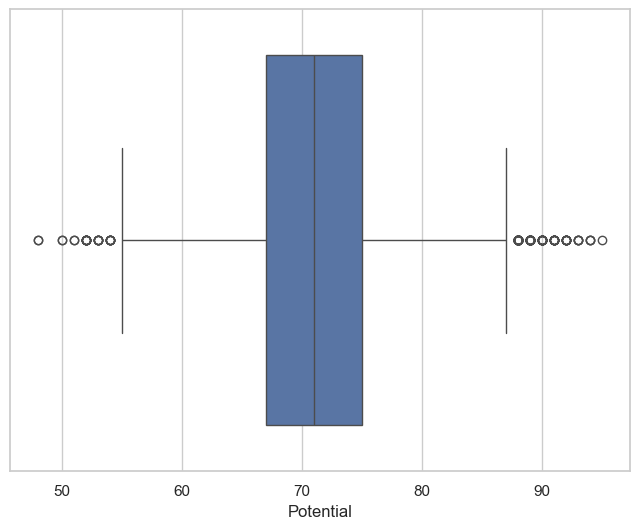

In [27]:
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x=fifa19["Potential"])
plt.show()

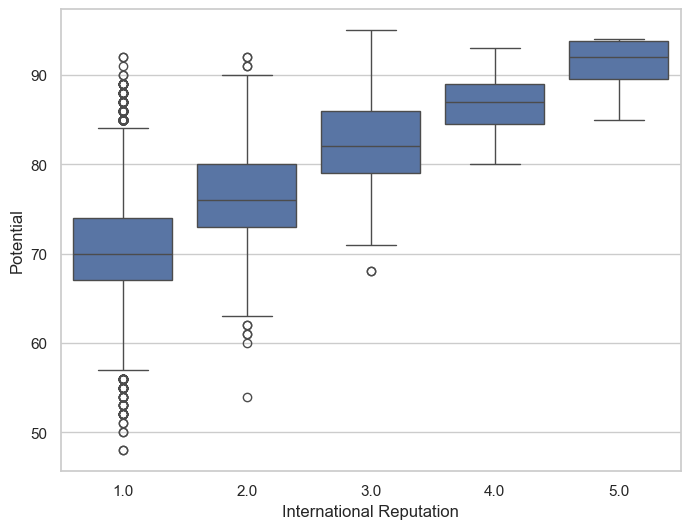

In [28]:
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x="International Reputation", y="Potential", data=fifa19)
plt.show()

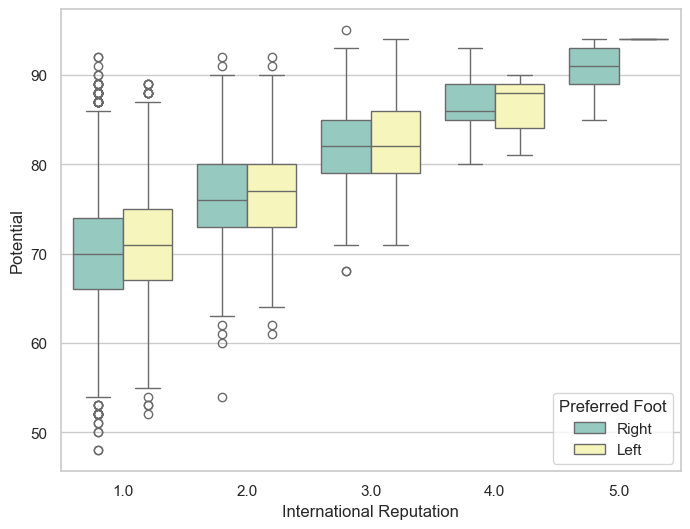

In [29]:
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x="International Reputation", y="Potential", hue="Preferred Foot",data=fifa19, palette="Set3")
plt.show()

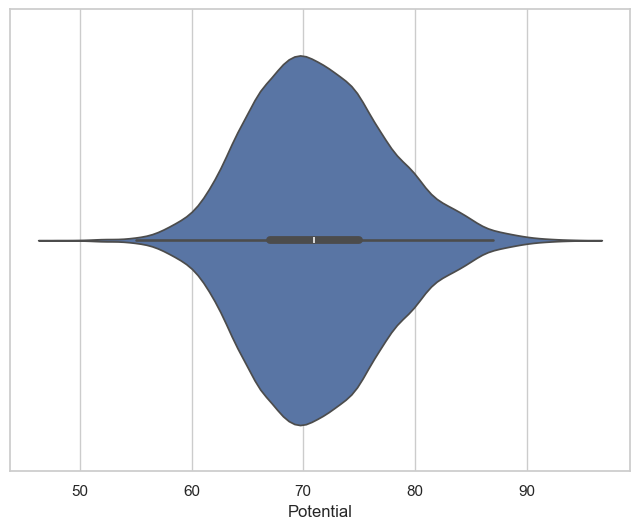

In [30]:
f, ax = plt.subplots(figsize=(8, 6))
sns.violinplot(x=fifa19["Potential"])
plt.show()

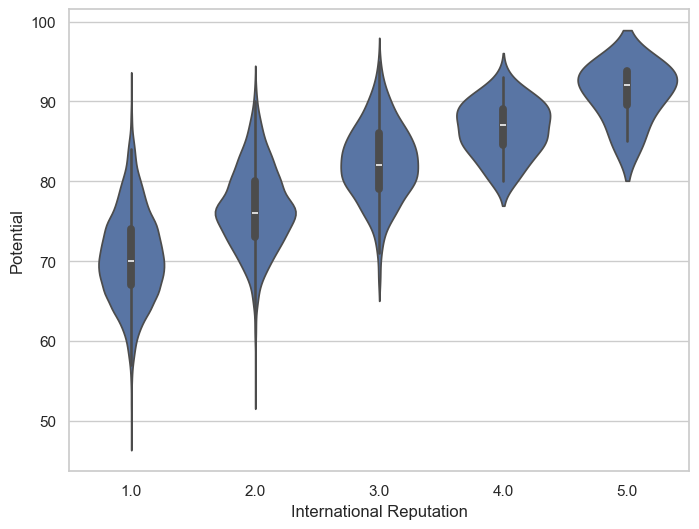

In [31]:
f, ax = plt.subplots(figsize=(8, 6))
sns.violinplot(x="International Reputation", y="Potential", data=fifa19)
plt.show()

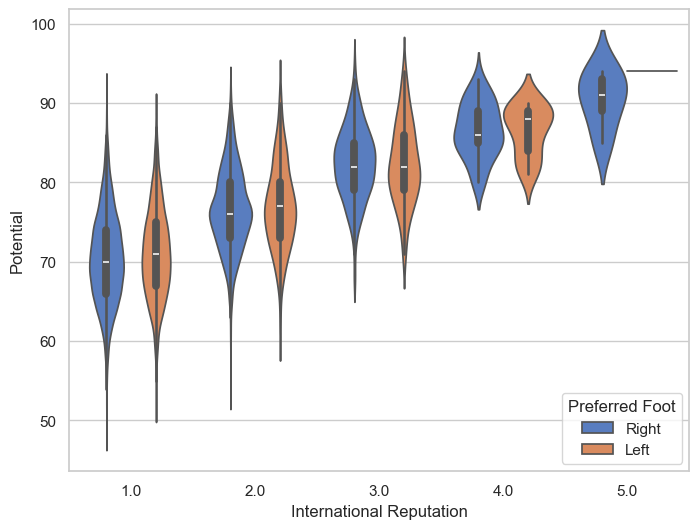

In [32]:
f, ax = plt.subplots(figsize=(8, 6))
sns.violinplot(x="International Reputation", y="Potential", hue="Preferred Foot", data=fifa19, palette="muted")
plt.show()

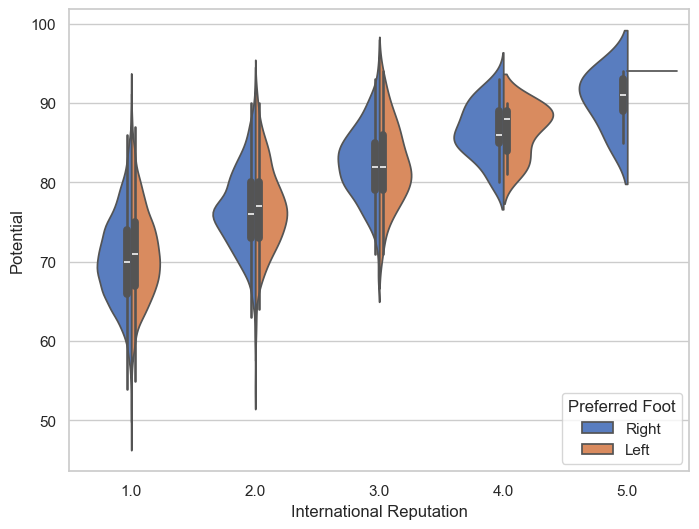

In [33]:
f, ax = plt.subplots(figsize=(8, 6))
sns.violinplot(x="International Reputation", y="Potential", hue="Preferred Foot",
               data=fifa19, palette="muted", split=True)
plt.show()

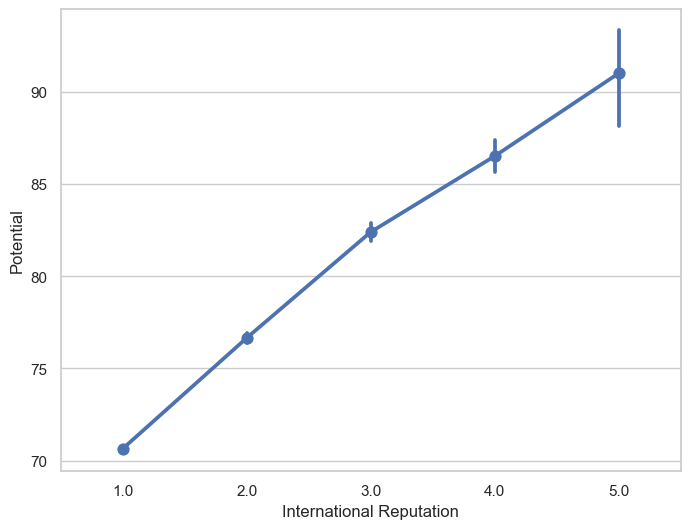

In [34]:
f, ax = plt.subplots(figsize=(8, 6))
sns.pointplot(x="International Reputation", y="Potential",  data=fifa19)
            
plt.show()

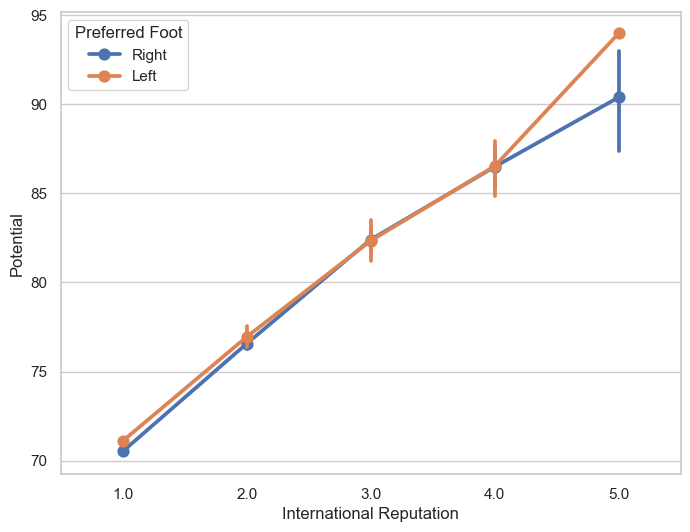

In [35]:
f, ax = plt.subplots(figsize=(8, 6))
sns.pointplot(x="International Reputation", y="Potential", hue="Preferred Foot", data=fifa19)
plt.show()

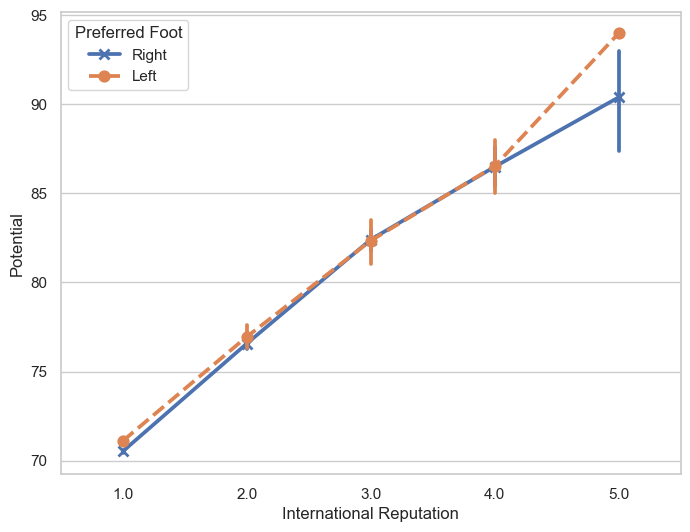

In [36]:
f, ax = plt.subplots(figsize=(8, 6))
sns.pointplot(x="International Reputation", y="Potential", hue="Preferred Foot",
              data=fifa19, markers=["x", "o"], linestyles=["-", "--"])
plt.show()

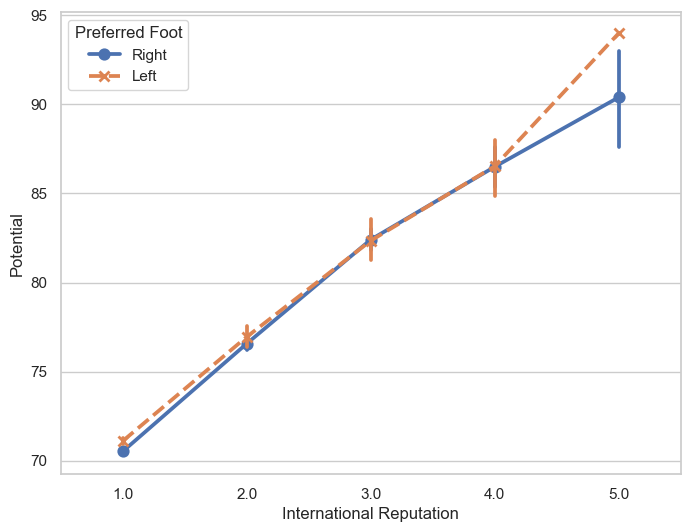

In [37]:
f, ax = plt.subplots(figsize=(8, 6))
sns.pointplot(x="International Reputation", y="Potential", hue="Preferred Foot", 
              data=fifa19, markers=["o", "x"], linestyles=["-", "--"])
plt.show()

In [38]:
# barplot

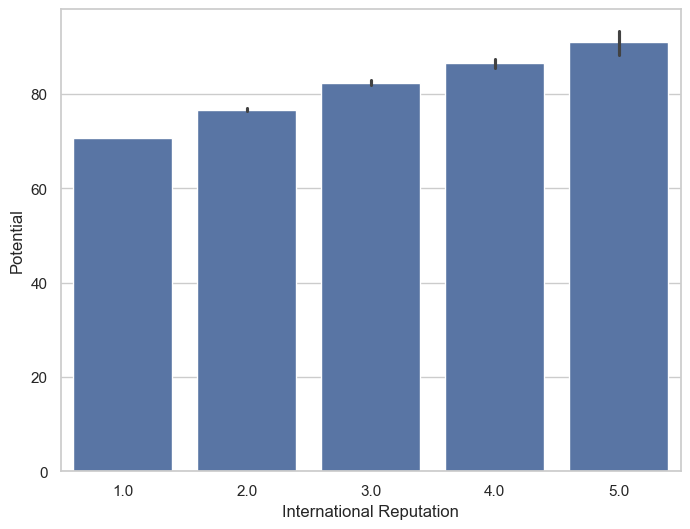

In [39]:
f, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x="International Reputation", y="Potential", data=fifa19)
plt.show()

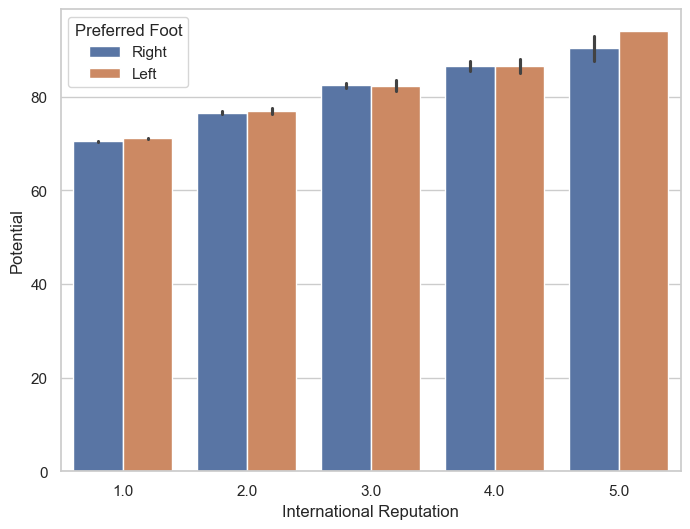

In [40]:
f, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x="International Reputation", y="Potential",hue="Preferred Foot", data=fifa19)
plt.show()

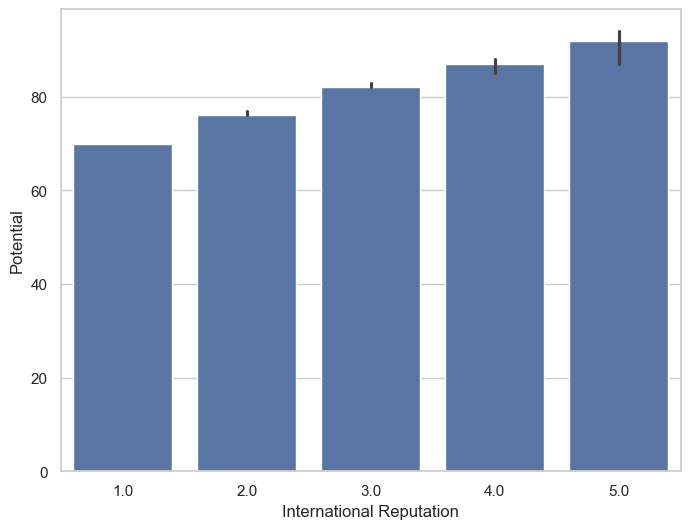

In [41]:
from numpy import median
f, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x="International Reputation", y="Potential", data=fifa19, estimator=median)
plt.show()

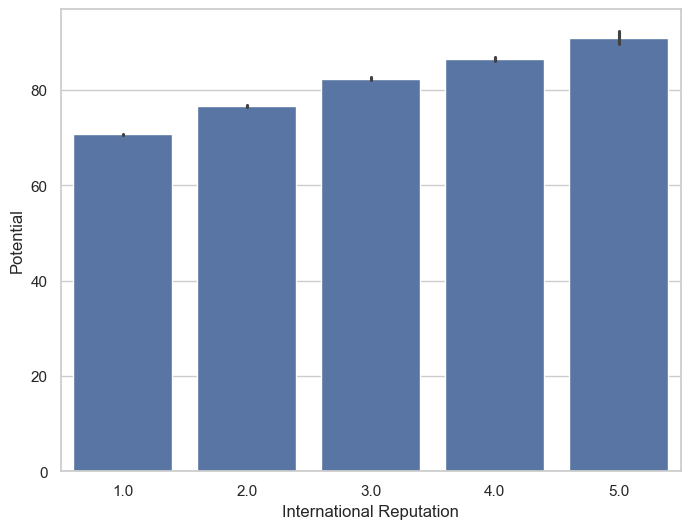

In [42]:
f, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x="International Reputation", y="Potential", data=fifa19, ci=68)
plt.show()

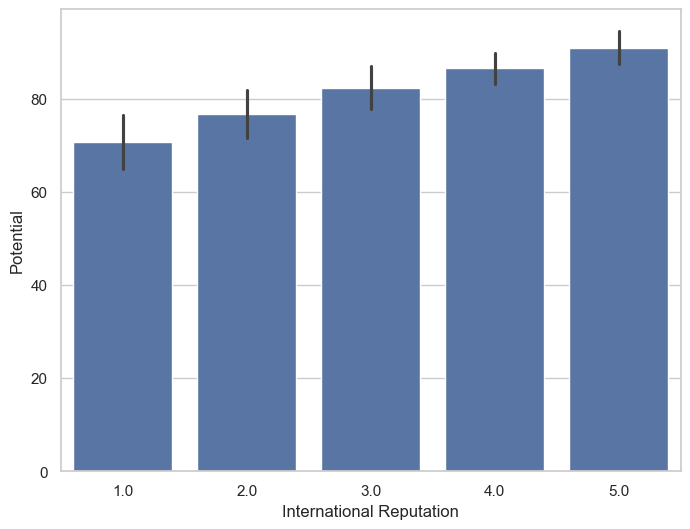

In [43]:
f, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x="International Reputation", y="Potential", data=fifa19, ci="sd")
plt.show()

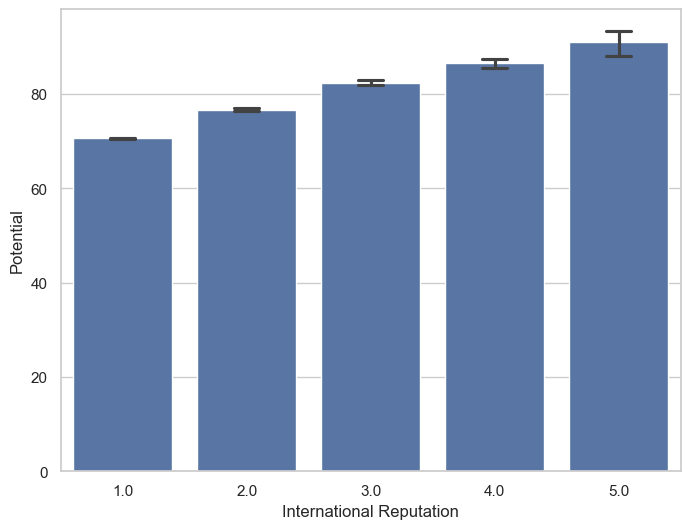

In [44]:
f, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x="International Reputation", y="Potential", data=fifa19, capsize=0.2)
plt.show()

In [45]:
# relplot

In [46]:
g = sns.relplot(x="Overall", y="Potential", data=fifa19)

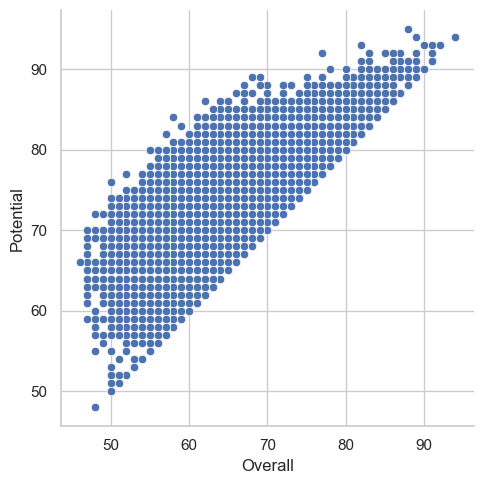

In [47]:
plt.show()

In [48]:
# scatterplot()

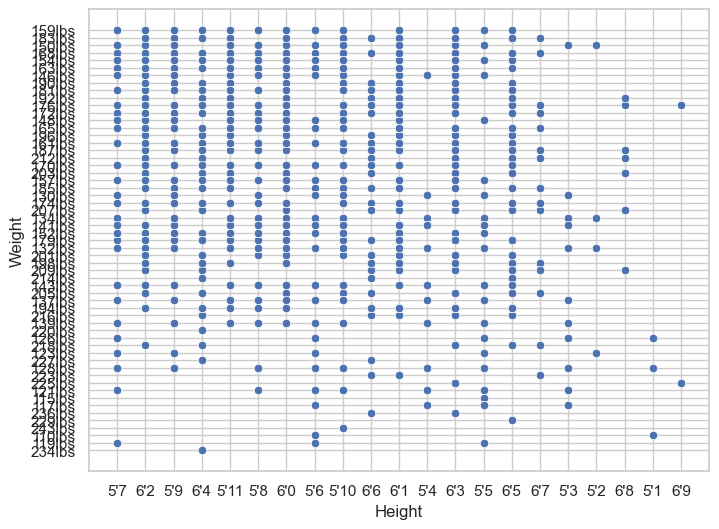

In [49]:
f, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(x="Height", y="Weight", data=fifa19)
plt.show()

In [50]:
# lineplot()

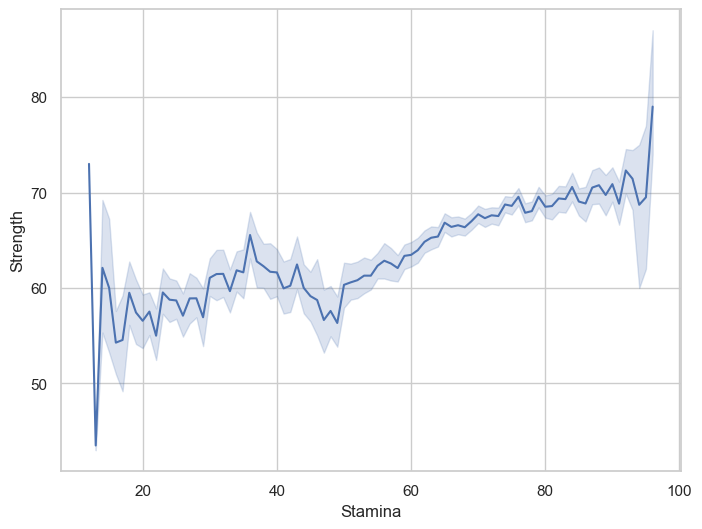

In [51]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.lineplot(x="Stamina", y="Strength", data=fifa19)
plt.show()

In [52]:
# regplot()

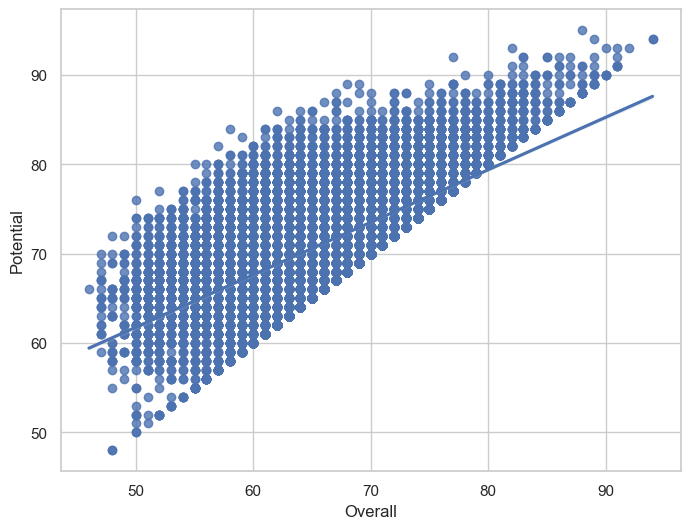

In [53]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.regplot(x="Overall", y="Potential", data=fifa19)
plt.show()

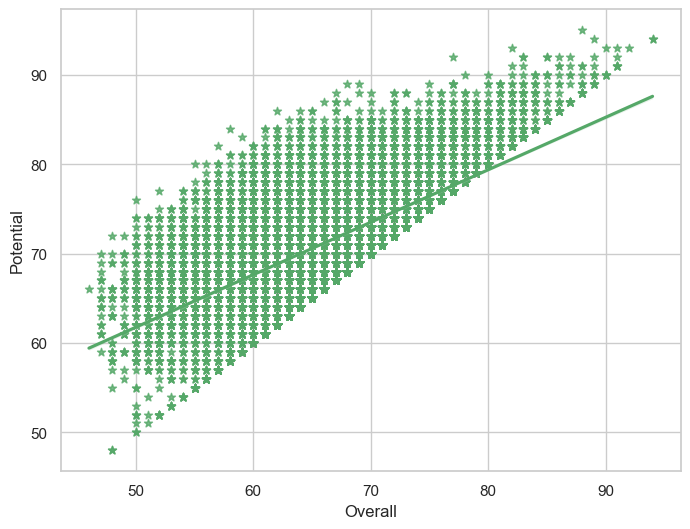

In [54]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.regplot(x="Overall", y="Potential", data=fifa19, color="g", marker="*")
plt.show()

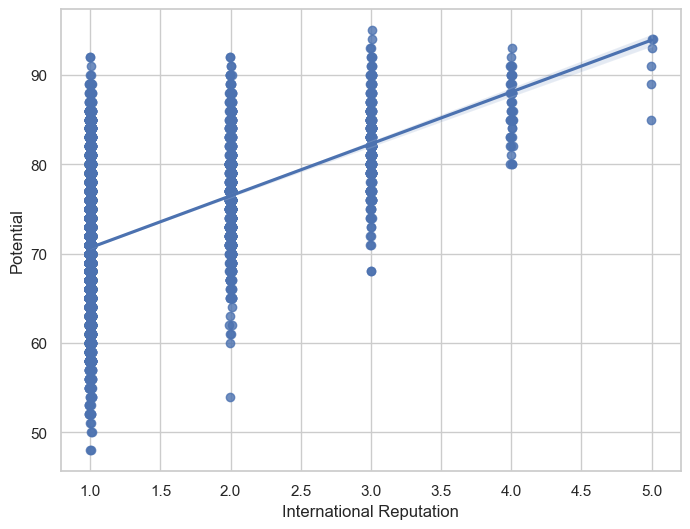

In [55]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.regplot(x="International Reputation", y="Potential", data=fifa19, x_jitter=.01)
plt.show()

In [56]:
g= sns.lmplot(x="Overall", y="Potential", data=fifa19)

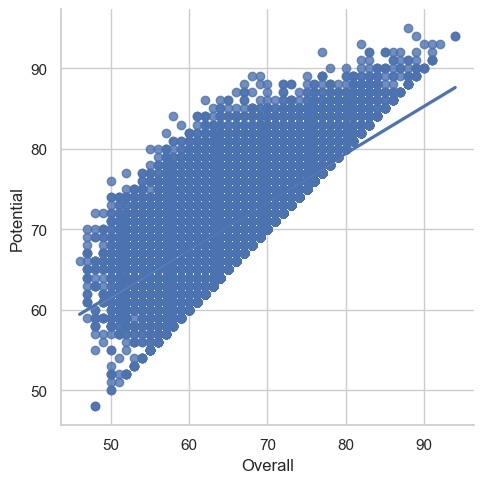

In [57]:
plt.show()

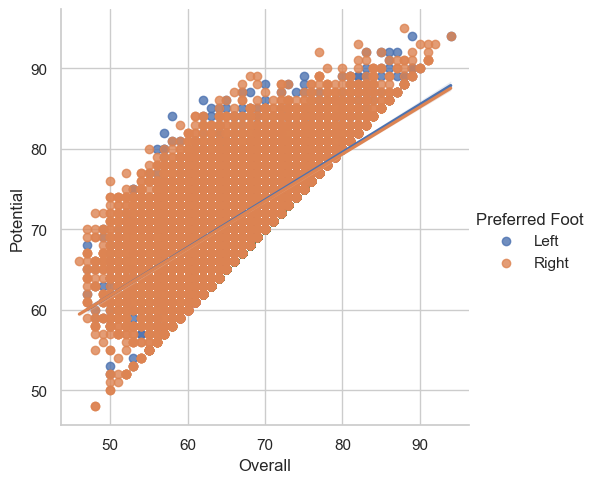

In [58]:
g= sns.lmplot(x="Overall", y="Potential",hue="Preferred Foot", data=fifa19)
plt.show()

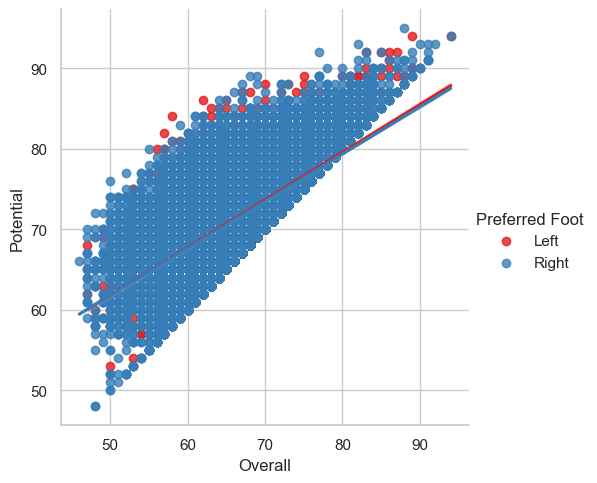

In [59]:
g= sns.lmplot(x="Overall", y="Potential", hue="Preferred Foot", data=fifa19, palette="Set1")
plt.show()

In [60]:
g= sns.lmplot(x="Overall", y="Potential", col="Preferred Foot", data=fifa19)

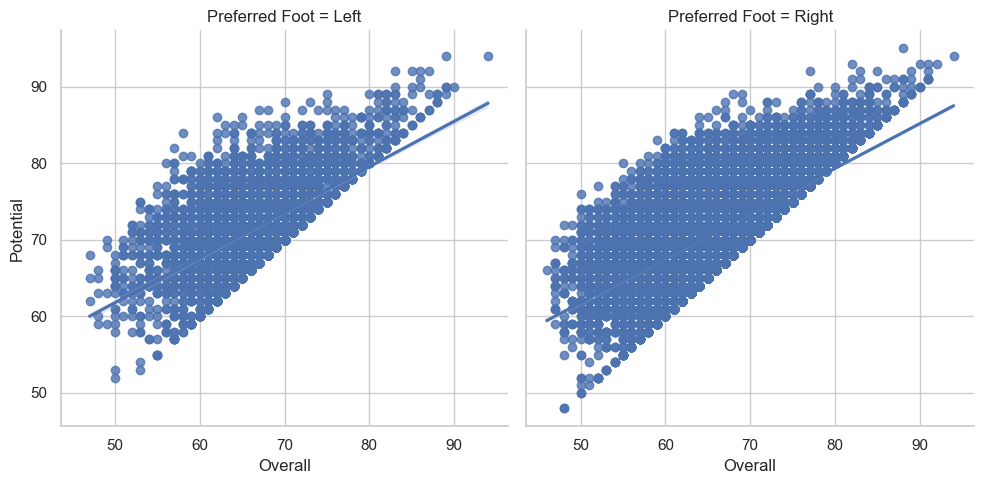

In [61]:
plt.show()

In [62]:
#multi plot grids

In [63]:
g = sns.FacetGrid(fifa19, col="Preferred Foot")

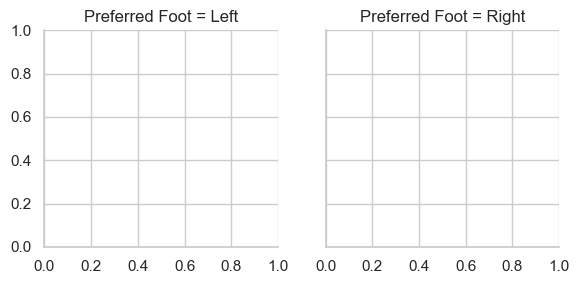

In [64]:
plt.show()

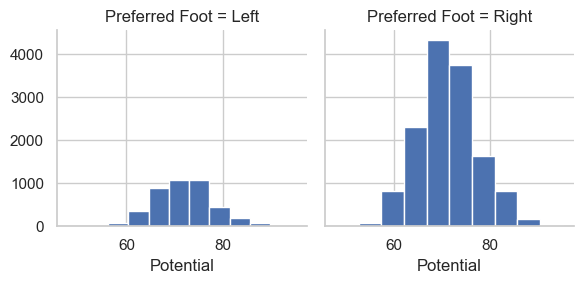

In [65]:
g = sns.FacetGrid(fifa19, col="Preferred Foot")
g = g.map(plt.hist, "Potential")
plt.show()

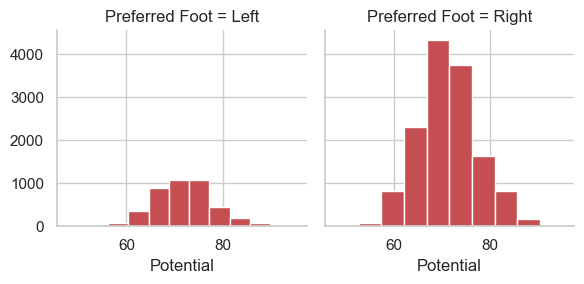

In [66]:
g = sns.FacetGrid(fifa19, col="Preferred Foot")
g = g.map(plt.hist, "Potential", bins=10, color="r")
plt.show()

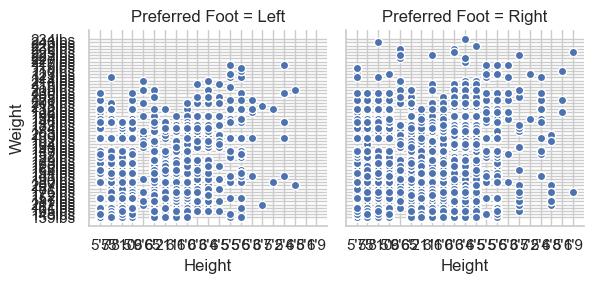

In [67]:
g = sns.FacetGrid(fifa19, col="Preferred Foot")
g = ( g.map(plt.scatter, "Height", "Weight", edgecolor="w").add_legend())
plt.show()

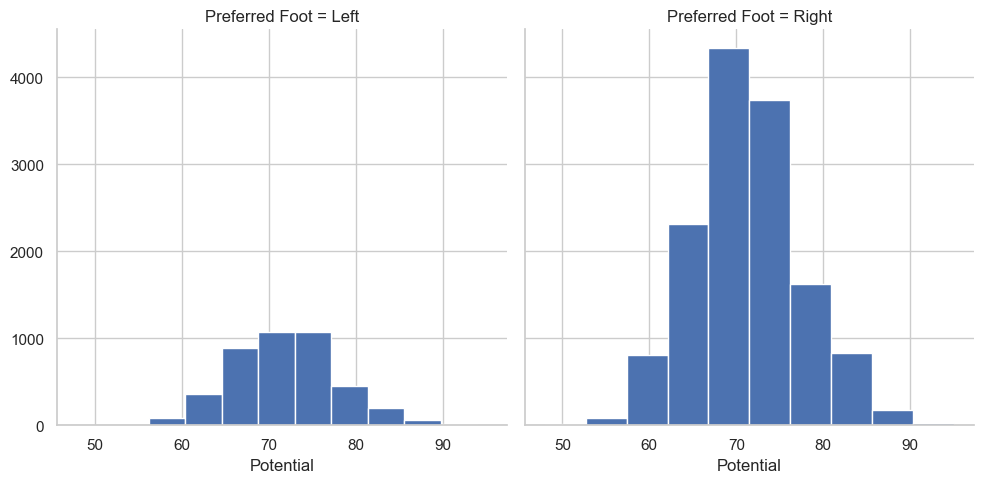

In [68]:
g = sns.FacetGrid(fifa19, col="Preferred Foot", height=5, aspect=1)
g = g.map(plt.hist, "Potential")
plt.show()

In [69]:
#pairgrid()

In [70]:
fifa19_new = fifa19[['Age', 'Potential', 'Strength', 'Stamina', 'Preferred Foot']]

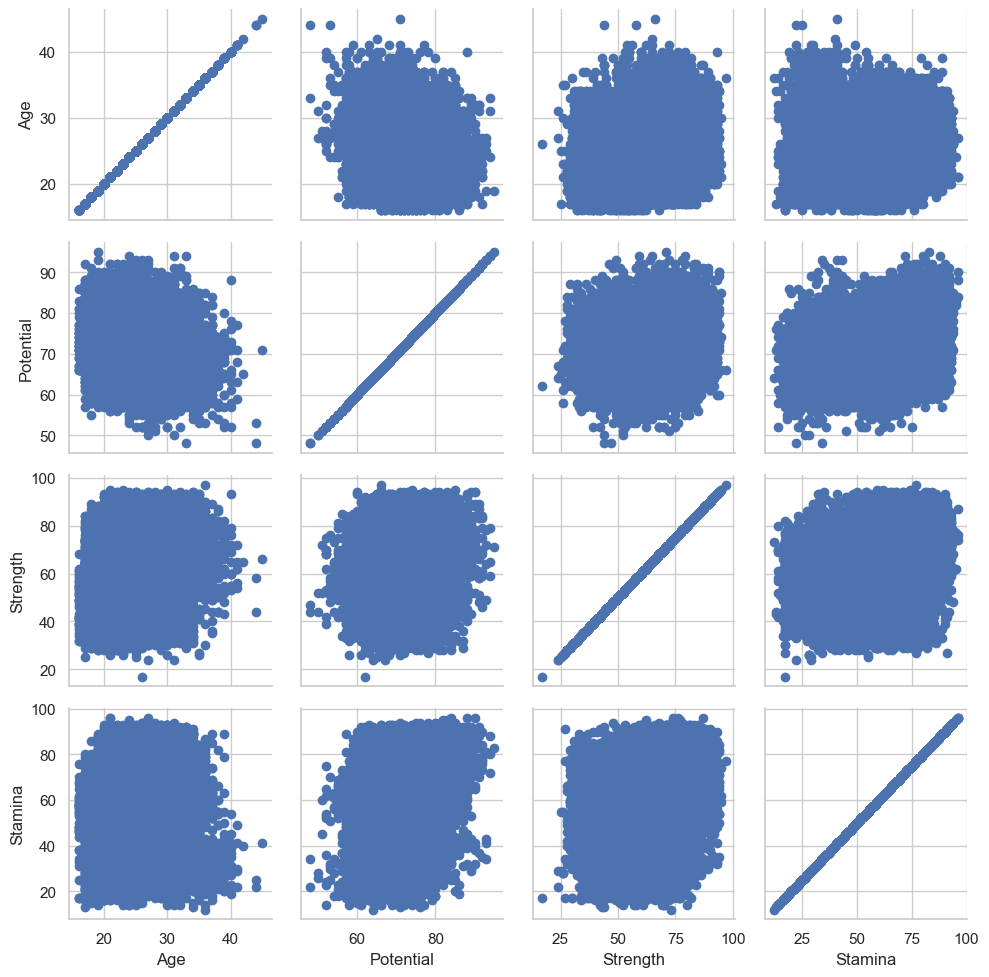

In [71]:
g = sns.PairGrid(fifa19_new)
g = g.map(plt.scatter)
plt.show()

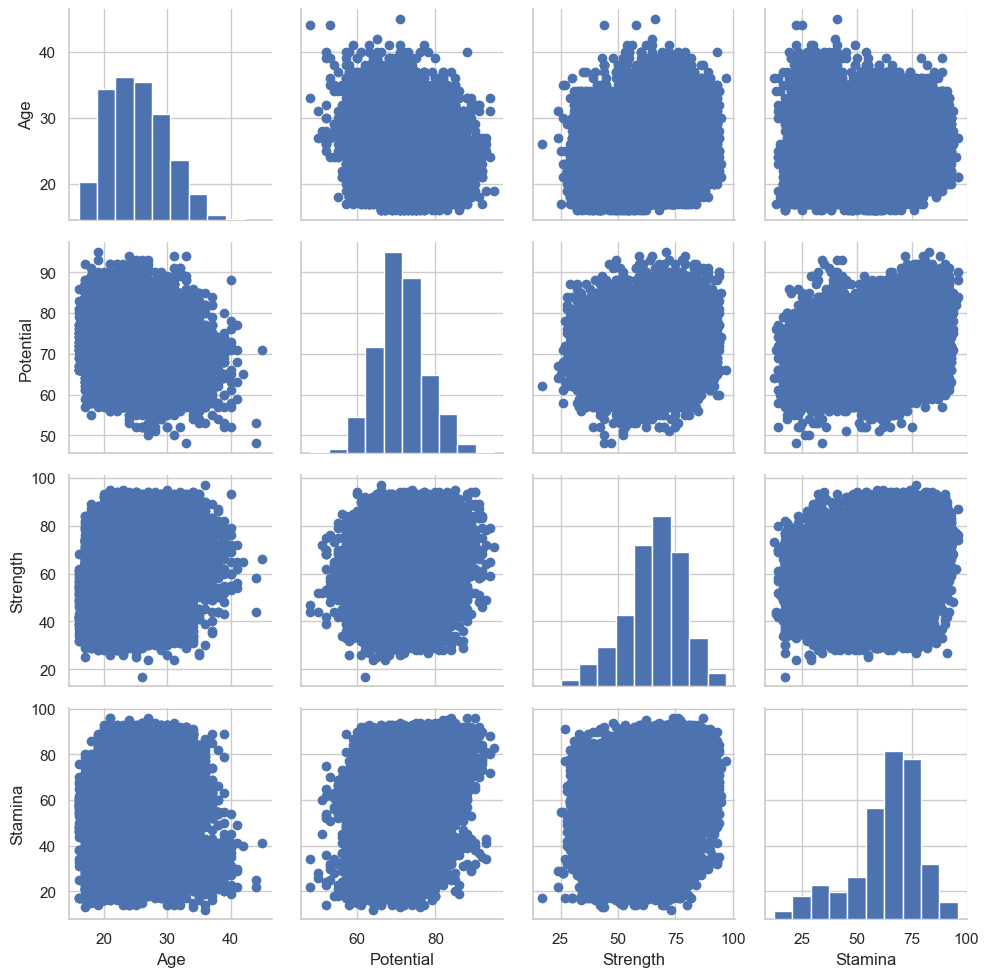

In [72]:
g = sns.PairGrid(fifa19_new)
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter)
plt.show()

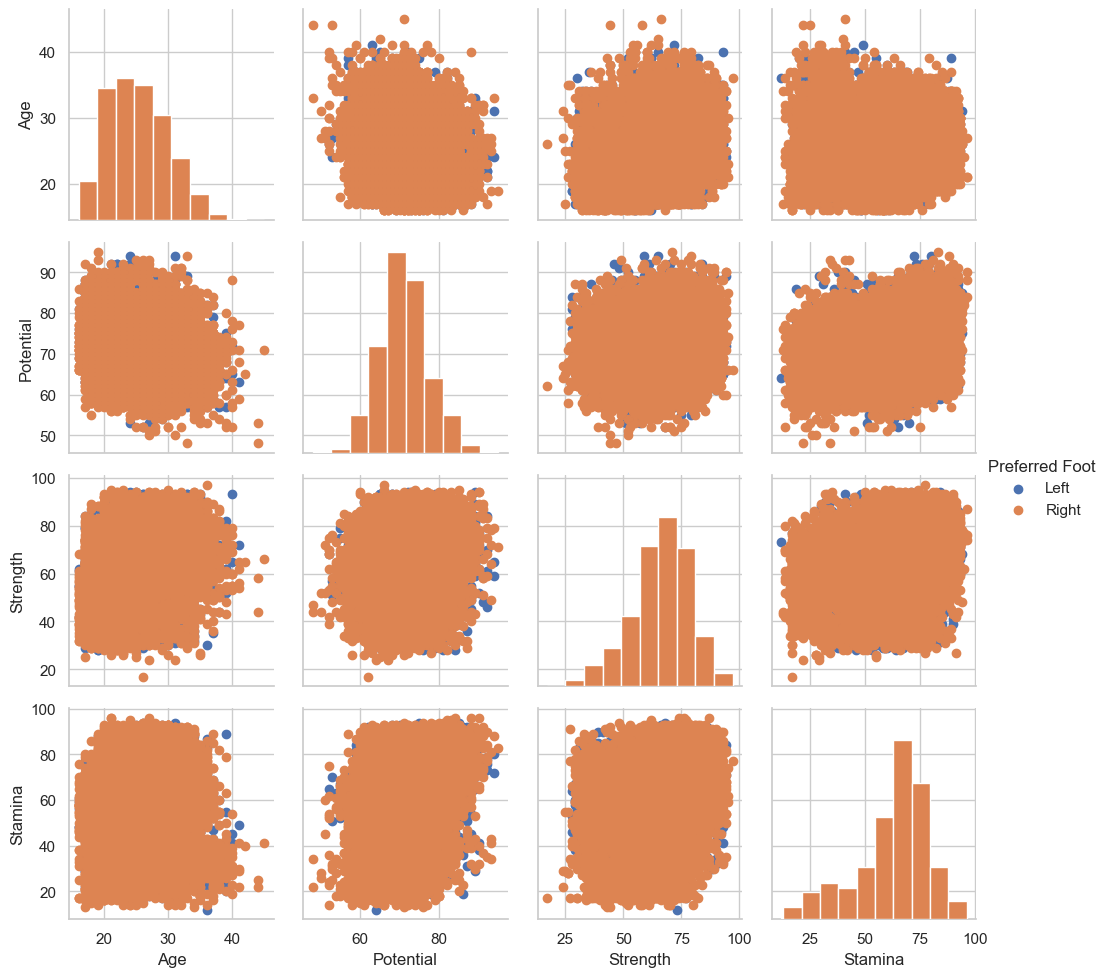

In [73]:
g = sns.PairGrid(fifa19_new, hue="Preferred Foot")
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter)
g = g.add_legend()
plt.show()

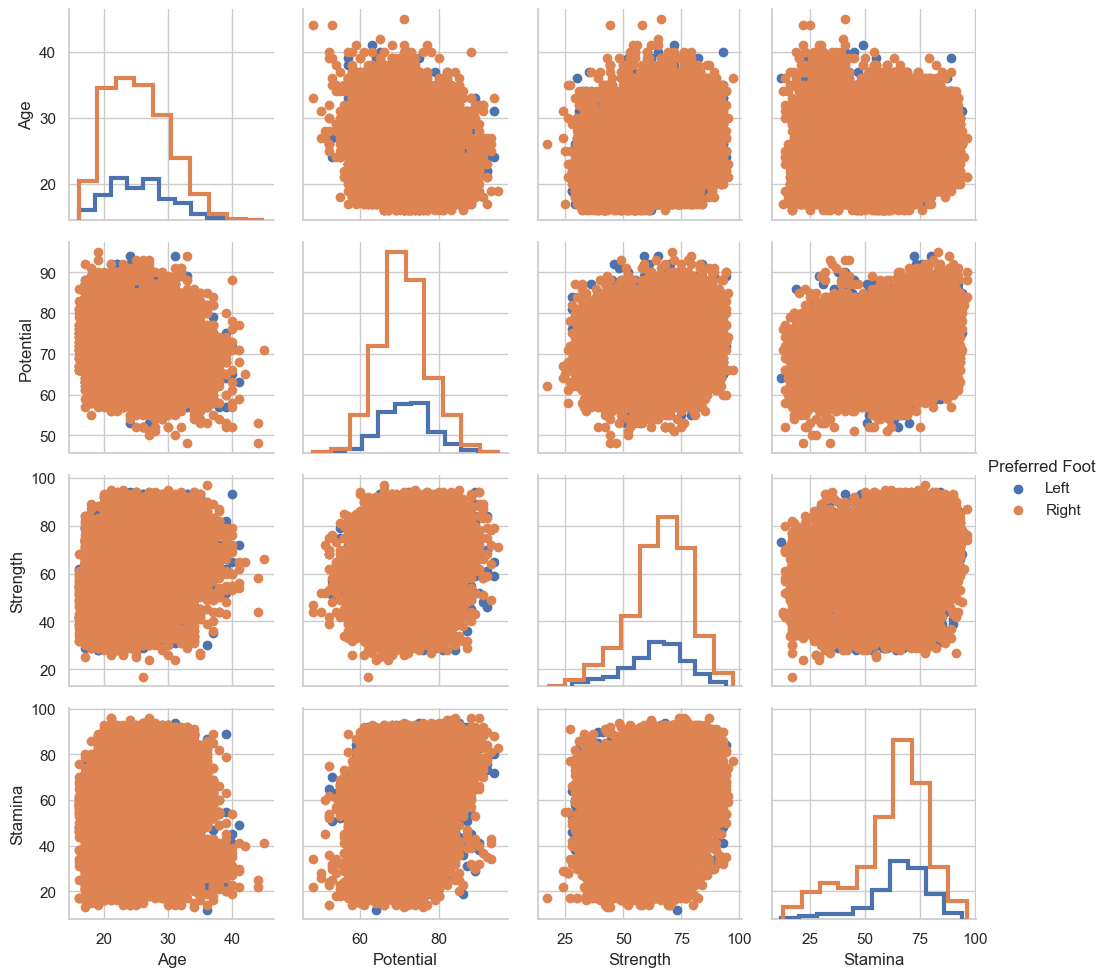

In [74]:
g = sns.PairGrid(fifa19_new, hue="Preferred Foot")
g = g.map_diag(plt.hist, histtype="step", linewidth=3)
g = g.map_offdiag(plt.scatter)
g = g.add_legend()
plt.show()

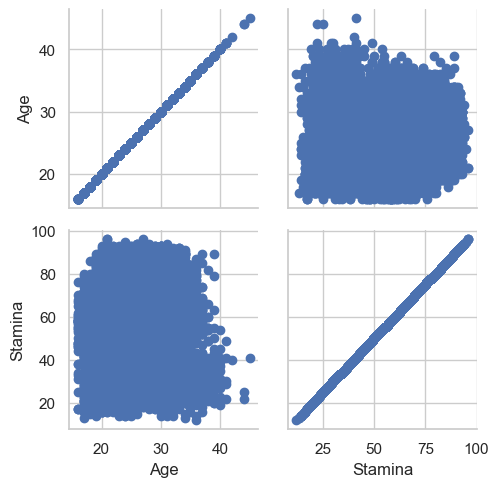

In [75]:
g = sns.PairGrid(fifa19_new, vars=['Age', 'Stamina'])
g = g.map(plt.scatter)
plt.show()

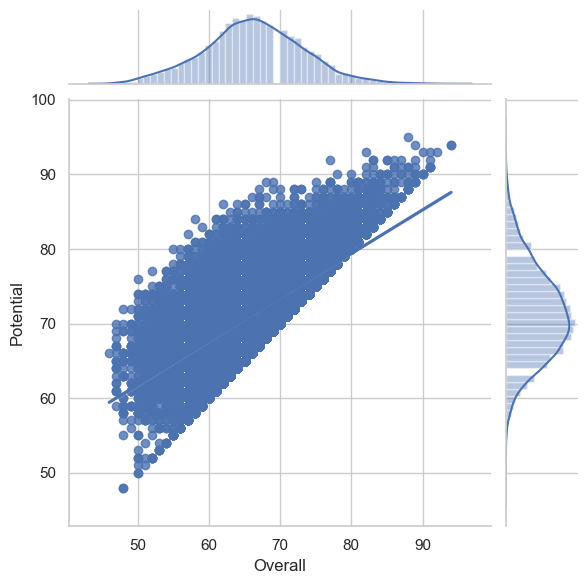

In [76]:
g = sns.JointGrid(x="Overall", y="Potential", data=fifa19)
g = g.plot(sns.regplot, sns.distplot)
plt.show()

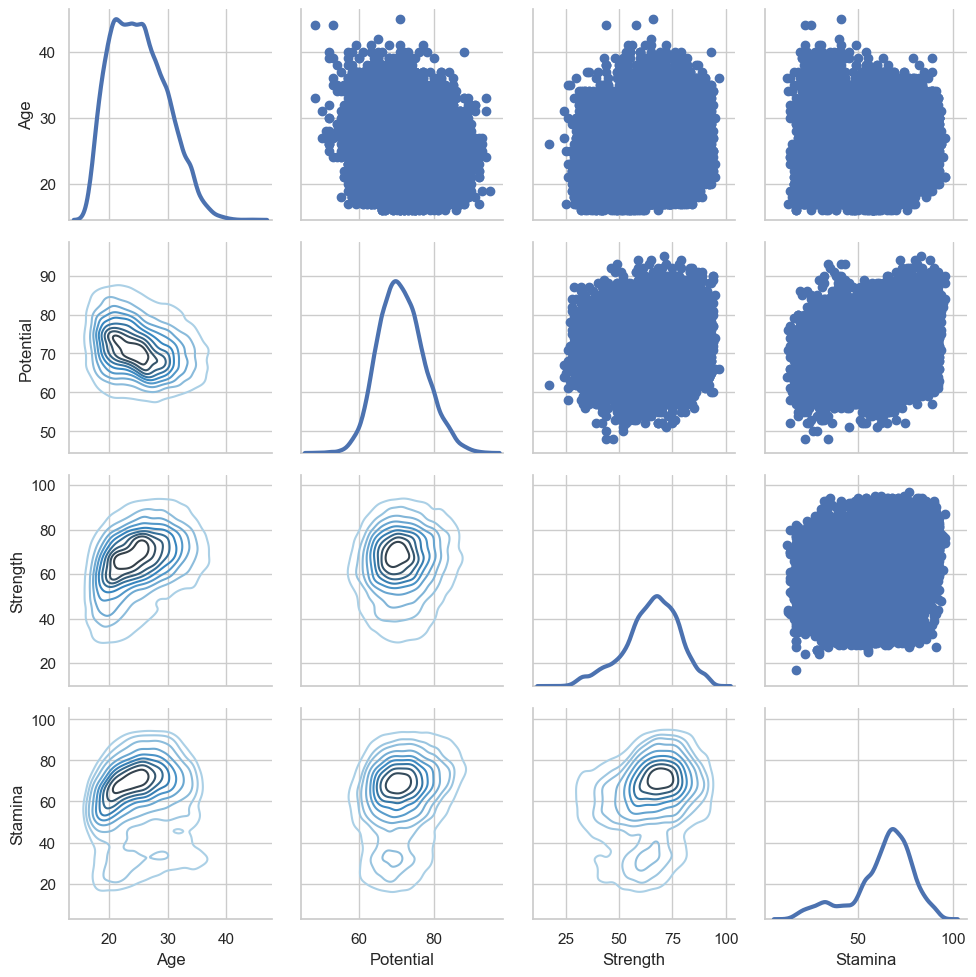

In [77]:
g = sns.PairGrid(fifa19_new)
g = g.map_upper(plt.scatter)
g = g.map_lower(sns.kdeplot, cmap="Blues_d")
g = g.map_diag(sns.kdeplot, lw=3, legend=False)
plt.show()

In [78]:
#jointgrid

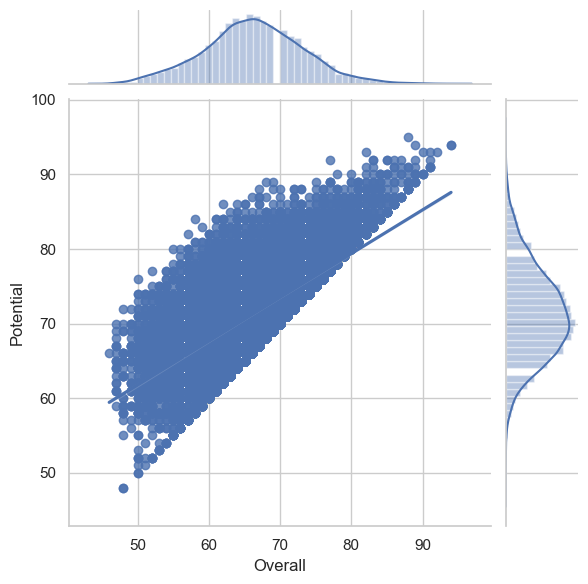

In [79]:
g = sns.JointGrid(x="Overall", y="Potential", data=fifa19)
g = g.plot(sns.regplot, sns.distplot)
plt.show()

In [80]:
import matplotlib.pyplot as plt

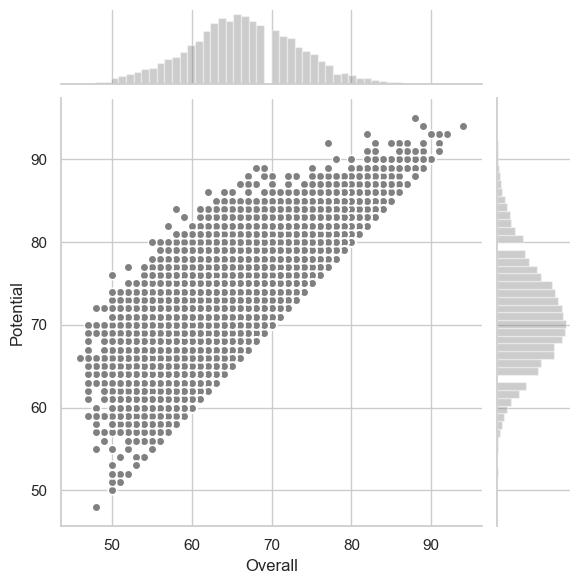

In [81]:
g = sns.JointGrid(x="Overall", y="Potential", data=fifa19)
g = g.plot_joint(plt.scatter, color=".5", edgecolor="white")
g = g.plot_marginals(sns.distplot, kde=False, color=".5")
plt.show()

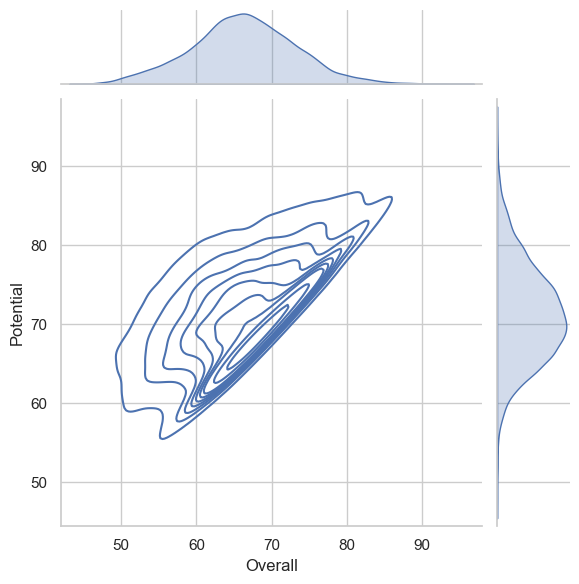

In [82]:
g = sns.JointGrid(x="Overall", y="Potential", data=fifa19)
g = g.plot_joint(sns.kdeplot, amap="Blue_d")
g = g.plot_marginals(sns.kdeplot, shade=True)
plt.show()

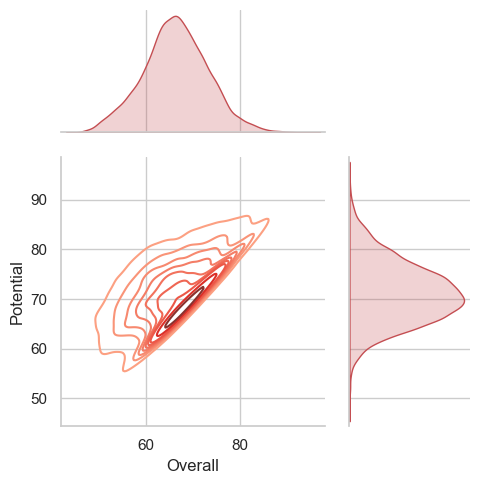

In [83]:
g = sns.JointGrid(x="Overall", y="Potential", data=fifa19, height=5, ratio=2)
g = g.plot_joint(sns.kdeplot, cmap="Reds_d")
g = g.plot_marginals(sns.kdeplot, color="r", shade=True)
plt.show()

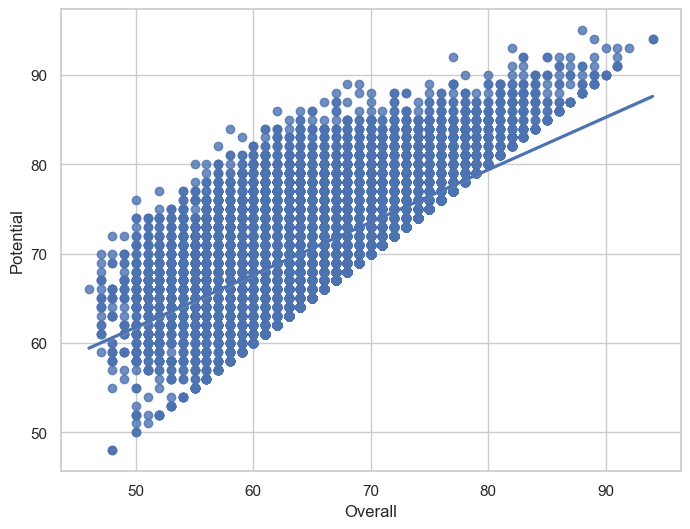

In [84]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.regplot(x="Overall", y="Potential", data=fifa19);
plt.show()

In [85]:
sns.lmplot(x="Overall", y="Potential", col="Preferred Foot", data=fifa19, col_wrap=2, height=5, aspect=1)

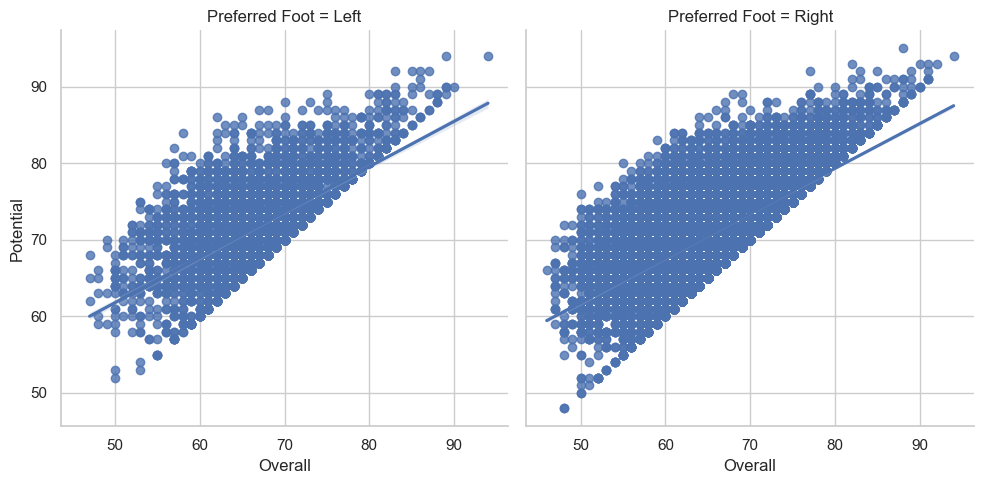

In [86]:
plt.show()

In [87]:
def sinplot(flip=1):
    x = np.linspace(0, 14, 100)
    for i in range(1, 7):
        plt.plot(x, np.sin(x + i * .5) * (7 - i) * flip)
plt.show()

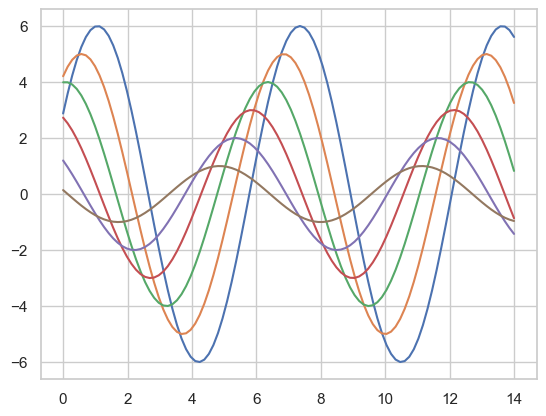

In [88]:
sinplot()
plt.show()

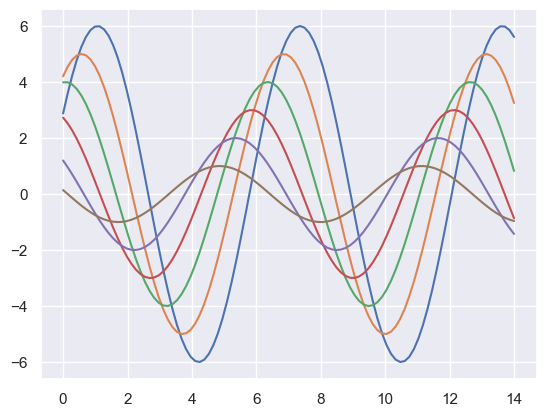

In [89]:
sns.set()
sinplot()
plt.show()

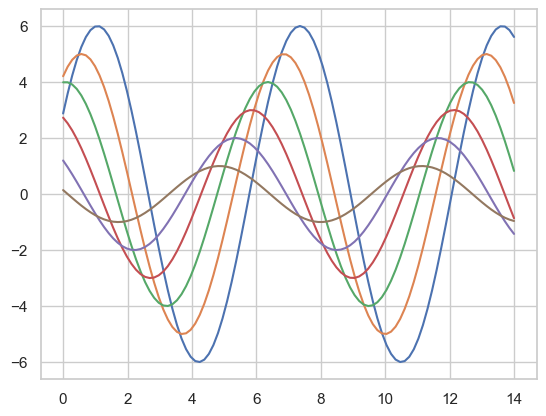

In [90]:
sns.set_style("whitegrid")
sinplot()
plt.show()

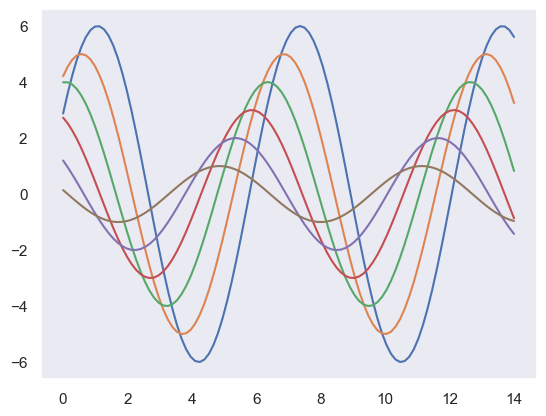

In [91]:
sns.set_style("dark")
sinplot()
plt.show()

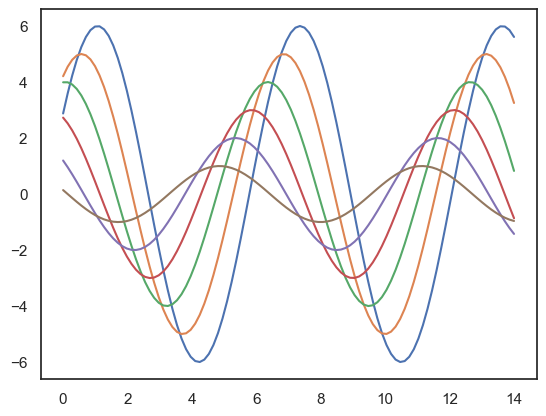

In [92]:
sns.set_style("white")
sinplot()
plt.show()

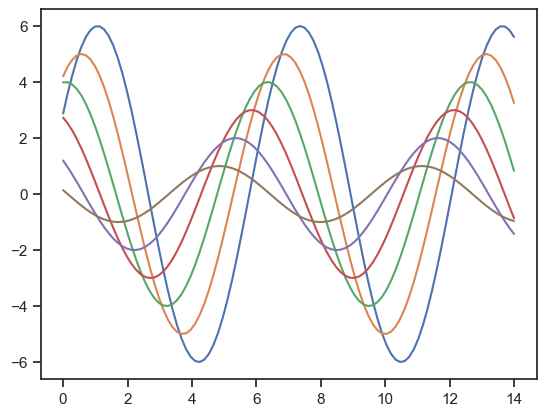

In [93]:
sns.set_style("ticks")
sinplot()
plt.show()